# Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from simple_markov_chain_lib import markov_chain
from numpy import random, pi, mean
from mpl_toolkits.mplot3d import Axes3D

# Παραδοτέο 1
## Ερώτημα 1
Κάθε φορά που η αλυσίδα φτάνει στην κατάσταση 1 σύμφωνα με τη Markov Property δηλαδή την ιδιότητα έλειψης μνήμης, είναι σαν να ξεκινήσαμε την αλυσίδα από την αρχή, αφού είμαστε στην ίδια initial state και έχουμε τον ίδιο πίνακα μεταβάσεων. Άρα δεν χρειάζεται κάθε φορά να σταματάμε και να ξανα-ξεκινάμε από την κατάσταση 1, απλά συνεχίζουμε.


## Ερώτημα 2 & 3

In [2]:
## Build Markov Chain
markov_table = {
    1: {2: 0.5, 3: 0.5},
    2: {1: 1/3, 4: 2/3},
    3: {3: 0.8, 4: 0.2},
    4: {1: 0.6, 4: 0.4}
}

for starting in [1,2,3,4]:
    init_dist = {starting: 1.0} #the chain starts from state 1 since we are interested in excursions around state 1.

    mc = markov_chain(markov_table, init_dist)

    N = 100_000

    ##Initialize the dictionary "visits". Every state is a key of this dictionary, with value 0
    visits = {state: 0 for state in (1, 2, 3, 4)} 

    mc.start()
    completed = 0
    stoppingTimeCounter = 0
    stoppingTimes = []
    ##Simulate N excursions. Every time we complete an excursion we increase completed by 1.
    while completed < N:
        visits[mc.running_state] += 1
        mc.move()
        stoppingTimeCounter += 1
        if mc.running_state == starting:
            stoppingTimes.append(stoppingTimeCounter)
            stoppingTimeCounter = 0
            completed +=1

    print("Invariant Distribution starting from {}:".format(starting))
    for x, y in visits.items():
        print("%d: %.3f" % (x, (y / N)/np.mean(stoppingTimes)))



Invariant Distribution starting from 1:
1: 0.186
2: 0.093
3: 0.463
4: 0.258
Invariant Distribution starting from 2:
1: 0.186
2: 0.093
3: 0.465
4: 0.257
Invariant Distribution starting from 3:
1: 0.185
2: 0.093
3: 0.466
4: 0.256
Invariant Distribution starting from 4:
1: 0.186
2: 0.093
3: 0.462
4: 0.259


Όσον αφορά το ερώτημα 2, αφού υπολογίσαμε τις αναλλοίωτες κατανομές θεωρητικά, παρατηρούμε ότι απέχουν ελάχιστα τα αποτελέσματα τις προσομοίωσης από τον θεωριτικό υπολογισμό.

Έπειτα, παρατηρούμε ότι όποια και να ναι η αρχική κατάσταση, οι αναλλοίωτες κατανομές παραμένουν ίδιες.

# Παραδοτέο 2
## Ερώτημα 1

Στο επόμενο κελί ακολουθεί η απάντηση για το ερώτημα και στο μεθεπόμενο μία οπτικοποίηση του αποτελέσματος.

In [3]:
Ntrials, Nhits = 1_000_000, 0
for n in range(Ntrials):
    x, y, z = random.uniform(-1, 1, 3) # draw 2 samples, each uniformly distributed over (-1,1)
    if x**2 + y**2 + z**2 < 1:
        Nhits += 1

print("Monte Carlo estimator of V(3): %.5f" % ((2**3)*(Nhits / Ntrials)))
print("Actual value of V(3) up to 5 decimal digits: %.5f" % (4*pi/3))
print("The relative error is %.5f%%" % (100 * abs((2**3)*(Nhits / Ntrials) - (4*pi/3))))


Monte Carlo estimator of V(3): 4.18349
Actual value of V(3) up to 5 decimal digits: 4.18879
The relative error is 0.53022%


Total number of samples drawn 19185
Number of samples in the sphere 10000


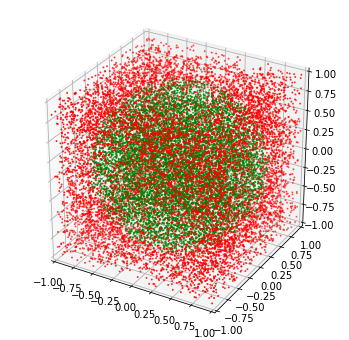

In [4]:
# Parameters
N = 10_000  # number of required points
Ntrials, Nhits = 0, 0
acc_x, acc_y, acc_z = [], [], []  # accepted x, y
rej_x, rej_y, rej_z = [], [], []  # rejected x, y

# Rejection Sampling
while Nhits < N:
    Ntrials += 1
    x, y, z = random.uniform(-1, 1, 3)

    if x**2 + y**2 + z**2 < 1:
        acc_x.append(x)
        acc_y.append(y)
        acc_z.append(z)
        Nhits += 1
    else:
        rej_x.append(x)
        rej_y.append(y)
        rej_z.append(z)

print("Total number of samples drawn %d" % Ntrials)
print("Number of samples in the sphere %d" % N)

plt.rcParams['figure.figsize'] = (6, 6)
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(acc_x, acc_y, acc_z, color = 'green', s = 1) # parameter s determines the size of each dot in the scatter plot
ax.scatter(rej_x, rej_y, rej_z, color = 'red', s = 1)

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
#ax.set_aspect('equal')  # set aspect ratio 1:1

plt.show()

## Ερώτημα 2 

Total number of samples drawn S = 19916
Number of samples in the disk N = 10000


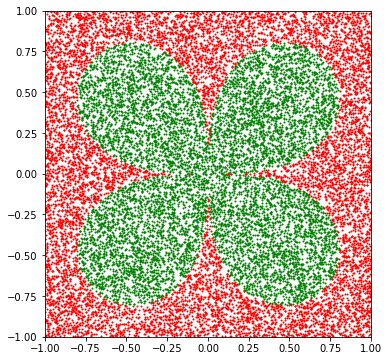

In [5]:
N = 10_000  # number of required points
Ntrials, Nhits = 0, 0
acc_x, acc_y = [], []  # accepted x, y
rej_x, rej_y = [], []  # rejected x, y

# Rejection Sampling
while Nhits < N:
    Ntrials += 1
    x, y = random.uniform(-1, 1, 2)
    if (x**2 + y**2)**2 <= 2*abs(x*y):
        acc_x.append(x)
        acc_y.append(y)
        Nhits += 1
    else:
        rej_x.append(x)
        rej_y.append(y)

print("Total number of samples drawn S = %d" % Ntrials)
print("Number of samples in the disk N = %d" % N)

ig, ax = plt.subplots()

plt.scatter(acc_x, acc_y, color = 'green', s = 1) # parameter s determines the size of each dot in the scatter plot
plt.scatter(rej_x, rej_y, color = 'red', s = 1)

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_aspect('equal')  # set aspect ratio 1:1

plt.show()

## Ερώτημα 3

In [6]:
Ntrials, Nhits = 1_000_000, 0
absXPlusY = []
for n in range(Ntrials):
    x, y = random.uniform(-1, 1, 2) # draw 2 samples, each uniformly distributed over (-1,1)
    if (x**2 + y**2)**2 <= 2*abs(x*y):
        absXPlusY.append(abs(x+y))
        Nhits += 1
VL = 4 * Nhits / Ntrials
print("Monte Carlo estimator of V(L): %.5f" % (VL))
print("Monte Carlo estimator of I: %.5f" % (VL * mean(absXPlusY)))

Monte Carlo estimator of V(L): 2.00140
Monte Carlo estimator of I: 0.99245
